In [2]:
# Import all required modules and function
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 


%matplotlib inline


In [3]:
# Reading the data from train_0OECtn8.csv file and spliting it into input and output 
data_set = pd.read_csv('train_0OECtn8.csv')
# data_set.head()
# data_set = data_set[data_set['age']>10]

# selecting independent attributes from data, excluding rowid,userid, videoid and dependent variable 
input_x=data_set.iloc[:,1:-1]
# input_x.drop('video_id',axis=1,inplace=True)


# selecting dependent variable as output 
output_y=data_set.iloc[:,-1]

input_x.head(5)
# type(input_x)
# output_y.head(2)

# data_set['engagement_score'].value_counts()


,user_id,category_id,video_id,age,gender,profession,followers,views
0,19990,37,128,24,Male,Student,180,1000
1,5304,32,132,14,Female,Student,330,714
2,1840,12,24,19,Male,Student,180,138
3,12597,23,112,19,Male,Student,220,613
4,13626,23,112,27,Male,Working Professional,220,613


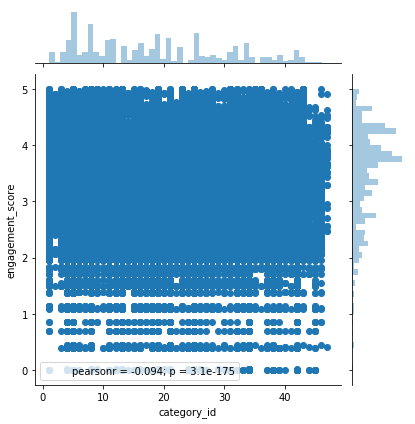

In [8]:
sns.jointplot(x='category_id',y='engagement_score',data=data_set)

In [3]:
# Reading data from test file for later testing 
test_data_df = pd.read_csv('test_1zqHu22.csv')
test_data_set = test_data_df.iloc[:,1:]
# test_data_set.drop('video_id',axis=1,inplace=True)
test_data_set.head()

,user_id,category_id,video_id,age,gender,profession,followers,views
0,7986,12,42,14,Male,Student,180,138
1,11278,34,115,14,Male,Student,230,840
2,17245,8,110,44,Female,Working Professional,280,628
3,9851,16,137,18,Male,Student,270,462
4,16008,34,96,47,Female,Other,230,840


In [4]:
# Encoding the category data of profession and gender
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Profession encoding
column_transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
input_x= np.array(column_transformer.fit_transform(input_x),dtype = np.str)
test_data_set = np.array(column_transformer.fit_transform(test_data_set),dtype =  np.str)

# Gender encoding
column_transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [7])], remainder='passthrough')
input_x= np.array(column_transformer.fit_transform(input_x),dtype = np.str)
test_data_set= np.array(column_transformer.fit_transform(test_data_set),dtype = np.str)

# Converting string array into float
input_x = input_x.astype(np.float)
test_data_set = test_data_set.astype(np.float)

print(input_x[:5])
print(test_data_set[:5])

[[0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 1.9990e+04
  3.7000e+01 1.2800e+02 2.4000e+01 1.8000e+02 1.0000e+03]
 [1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 5.3040e+03
  3.2000e+01 1.3200e+02 1.4000e+01 3.3000e+02 7.1400e+02]
 [0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 1.8400e+03
  1.2000e+01 2.4000e+01 1.9000e+01 1.8000e+02 1.3800e+02]
 [0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 1.2597e+04
  2.3000e+01 1.1200e+02 1.9000e+01 2.2000e+02 6.1300e+02]
 [0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 1.3626e+04
  2.3000e+01 1.1200e+02 2.7000e+01 2.2000e+02 6.1300e+02]]
[[0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 7.9860e+03
  1.2000e+01 4.2000e+01 1.4000e+01 1.8000e+02 1.3800e+02]
 [0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 1.1278e+04
  3.4000e+01 1.1500e+02 1.4000e+01 2.3000e+02 8.4000e+02]
 [1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 1.7245e+04
  8.0000e+00 1.1000e+02 4.4000e+01 2.8000e+02 6.2

In [5]:
print(input_x[1][7])
type(input_x[1][7])

132.0


numpy.float64

In [6]:
# spliting the data into train and test 
input_train, input_test, output_train, output_test =  train_test_split(input_x,output_y,test_size=0.2)

In [7]:
# selecting the simple linear regression model 
model = LinearRegression()

# fitting the train data to the model
model.fit(input_train,output_train)

LinearRegression()

In [8]:
# Predicting the Test set results
predicted_output = model.predict(input_test)

# to show max 2 digits after decimal
np.set_printoptions(precision=2)

predicted_output =  np.around(predicted_output, decimals = 2)
# print(predicted_output[:10],'\n')

# changing 'actual output' series to a ndarray
output_test=output_test.to_numpy(dtype ='float64')

# comparision between  predicted output(left) and actual output(right)
print(np.concatenate((predicted_output.reshape(len(predicted_output),1),output_test.reshape(len(output_test),1)),axis=1)[:10][:])


[[2.9  1.61]
 [2.72 2.08]
 [2.82 2.2 ]
 [4.18 3.93]
 [3.43 4.25]
 [3.47 4.41]
 [3.52 3.56]
 [4.14 4.51]
 [2.7  3.13]
 [2.91 3.43]]


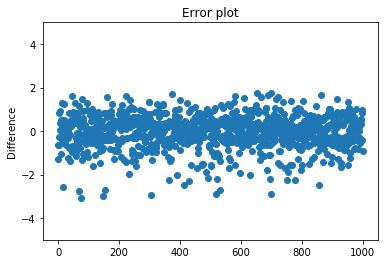

In [22]:
# ploting the error difference for 1000 points (points on Y= 0 has no error)
plt.plot(output_test[:1000] - predicted_output[:1000] ,marker='o',linestyle='')
plt.ylim(-5,5)
plt.ylabel('Difference')
plt.title('Error plot')
plt.show()

In [10]:
# R2 scoring for the model with known test data
from sklearn.metrics import r2_score
r2_score(output_test, predicted_output)

0.2653628265944272

In [11]:
# was checking if any outliers in age column 
# input_x_df =  pd.DataFrame(input_x[:,[5]],columns=['age'])
# print(input_x_df.value_counts())
# Using Random forest regression algorithm
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=150,min_samples_split = 60,min_samples_leaf=60,random_state = 60)
regressor.fit(input_train, output_train) 

RandomForestRegressor(min_samples_leaf=60, min_samples_split=60,
                      n_estimators=150, random_state=60)

In [12]:
predicted_output_random =  regressor.predict(input_test)

In [13]:
r2_score(output_test, predicted_output_random)

0.3525813697473258

In [14]:
# Predicting the test file using built model
final_test_predicted = model.predict(test_data_set)
final_test_predicted = np.around(final_test_predicted, decimals = 2)
# print(final_test_predicted[:20])

In [15]:
# Creation of solution.csv using row_ids and predicted values for upload 
row_ids = test_data_df.iloc[:,0]
final_test_predicted =final_test_predicted.flatten()
final_test_predicted = pd.Series(final_test_predicted, name = 'engagement_score' )
solution = pd.concat([row_ids,final_test_predicted],axis =1)
solution.to_csv('solution.csv',index = False)